<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color=red> Clustering: Extrayendo patrones de datos</font>**

En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

# 1. Bibliotecas utilizadas
Las versiones de las bibliotecas que usaremos son las siguientes:




In [ ]:
# 1°) Importamos las bibliotecas que esteramos usando --->

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.25.2
seaborn --> 0.13.1
sklearn --> 1.2.2


In [ ]:
# 2°) Cargamos archivo de tarjetas de credito, descargado de la pagina KAGGLE y guardado en pc --->

dataset = pd.read_csv("CC GENERAL.csv", sep= ",")
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Ejemplo:

Juliana es dueña de una plataforma online que vende zapatos. Ella quiere conocer el perfil y también otras características de sus clientes, como por ejemplo: edad, valor de compras, modelos vendidos, frecuencia de compras, etc. cuáles estrategias Juliana podría adoptar en su empresa ??



*   Utilizar la clusterización para agrupar a los clientes con base en la similaridad de sus perfiles. Ya que no tenemos como categorizar el perfil de un cliente, empleamos la clusterización para así descubrir este perfil y crear dichas categorías.
*   Utilizar la clasificación para determinar cuál es la frecuencia de compras de un cliente con base en las siguientes categorías: baja, media y alta. La frecuencia es un atributo que logramos categorizar fácilmente, atribuyendo los rótulos: baja, media o alta. Como tenemos los rótulos, podemos utilizar la técnica de clasificación y así clasificar nuevos clientes.



###-Procesamiento y obtencion de Clusters

Realizaremos el procesamiento de los datos para posteriormente realizar nuestros CLUSTERS.









In [ ]:
# 1°) Visualizaremos nuestro dataset con la primeras 3 filas, vemos Clientes(CUST_ID), Saldo en Cuenta(BALANCE), Compras(PURCHASES), en una sola
# Compra(ONEOFF_PURCHASES), Compras en Cuota(INSTALLMENTS_PURCHASES), Transacciones de Compras(PURCHASES_TRX), etc, vamos a realizar CLUSTERING para
# ver el comprtamiento del cliente con su tarjeta de credito --->

dataset.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
# 2°) Quitamos CUST_ID del Cliente y TENUERE que es el contrato de 12 meses de renovacion de la tarjeta, ya que estos 2 NO nos
# brinda ninguna informacion --->

dataset.drop(columns=["CUST_ID", "TENURE"], inplace=True)# Inplace=True, para que haga efectivo el cambio
dataset.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000


In [ ]:
# 3°) Vamos a ver que valores FALTANTES en informacion tenemos en el dataset ---->

missing = dataset.isna().sum() #isna(), valores nulos, sum(), para que los sume los valores faltantes de cada atributo
missing

# Nos devuelve que tenesmo en CREDIT_LIMIT 1 missing y en MINIMUM_PAYMENTS 313 missing, datos faltantes y necesitamos que sean 0.

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
# 4°) Resolvemos los MISSING, rellenando los valores por la MEDIANA, ya que ella deja afuera los OUTLIERS es la mejor opcion,
# a traves del metodo FILLNA() que permite sustituir los valores Nulos por otro valor segun el criterio, en este caso MEDIAN() --->

dataset.fillna(dataset.median(), inplace=True)#FILLNA()=para sustituir valores Nulos, MEDIAN()=sustituimos por la mediana esos valores nulos
missing = dataset.isna().sum() # Volvemos a ver si se efectuaron los cambios en los Atributos con valores Nulos.
missing

# Nos devuelve CREDIT_LIMIT y MINIMUM_PAYMENTS sin los valores Nulos.

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
# 5°) Ahora NORMALIZAMOS nuestro valores del dataset, ya que por ejemplo tenemos valores expreados en miles(6442.945483) y otros valores
# expresados en % entre el 0 y 1(0.222222), tenemos que colocar todo en el mismo rango de valores --->

#Importamos
from sklearn.preprocessing import Normalizer
#Creamos Variable para Instanciar Normalizer
values = Normalizer().fit_transform(dataset.values) # Instanciamos Normalizer y transforamos los valores del dataset
values

# Nos devuelve los valores en forma de ARRAY ya normalizados.

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
# 6°) Vamos a crear nuestros ***CLUSTERS*** utilizando KMEANS --->

from sklearn.cluster import KMeans # KMEANS = Algoritmo de CLUSTERIZACION mas usado.

#Instanciamos KMEANS y pasamos 3 parametros importantes
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)#N_CLUSTER=cantidad de clusters,N_INIT=n° de inicializacion para garantizar valores constantes,MAX_ITER=maximo de Iteraciones
#Creamos variable para el modelo Kmeans
y_pred = kmeans.fit_predict(values)#FIT_PREDICT=para los valores transformados en el ARRAY


Ejercicio:

Antes de ejecutar un algoritmo de clustering es necesario realizar el preprocesamiento de los datos. Así, disminuímos el riesgo de presentar errores al momento de agruparlos.
De esta manera, cuál de las siguientes opciones describe mejor lo que debe ser hecho en la etapa de preprocesamiento?



*   Normalizar los datos ya que los valores de cada atributo deben estar en el mismo intervalo. Los valores de cada atributo deben estar en el mismo intervalo; en el caso contrario, el algoritmo de agrupamiento podría acabar priorizando únicamente algunos atributos.




# **<font color=red>  2. Obteniendo los *clusters* y entendiendo criterios y métricas de validación</font>**



###-Metricas y Validacion

***METRICAS:*** Principalmente se dividen en 2.



*   **INTERNAS**(Neseceitamos los LABELS), se utilizan en APRENDIZAJE de SUPERVISADO de maquinas y necesitamos de Labels, Rotulos(ejemplo del ejercicio, riego del cliente en pago: RIESGO ALTO, MEDIO, BAJO)rotulos

*  **EXTERNAS**(Independiente de LABELS), las Externas NO dependen de Labels y estas Metricas estaremos utilizando para realizar el CLUSTERS.


***VALIDACION*** : Existen principalmente dos criterios para validar los clusters. Dichos criterios son el de compactación, y el de separación.


*   **COMPACTACION**, El criterio de compactacion hace referencia a la distancia entre los puntos de mismo cluster. El criterio de compactación establece que mientras más cercanos estén los puntos entre sí, el mismo será más compacto.
*  **SEPARACION**, El criterio de separación hace referencia a la distancia entre los puntos de clusters diferentes.  El criterio de separación establece que mientras más distantes estén los puntos entre sí, habrá más diversidad.



###-Matematica de Silhouette

(Explicacion en Cuadernillo.)

Con base en los criterios de validación vistos, y recordando que el valor de este coeficiente debe estar en el intervalo [-1, 1], marca la alternativa correcta:


*  En cuanto más cercano de 1 se encuentre el valor de silhouette más separados están los **Clusters**. Un valor más cercano a 1 indica clusters más separados entre sí.



###-**Calculando Silhouette**

Vamos a calcular el COEFICIENTE SILHOUETTE

In [ ]:
# 1°) Importamos METRICS de SKLEARN --->

from sklearn import metrics

In [ ]:
# 2°) Creamos la Variable LABELS y vamos a tomar cada uno de los valores y se lo atribuimos a un CLUSTERS especifico --->

labels = kmeans.labels_
# Tomamos kmeans y los labels y los atribuimos a la variable.

#Creamos otra variable:
silhouette = metrics.silhouette_score(values, labels, metric="euclidean")# En la Variable guardamos los Score de Silhouette con 3 parametros importantes
#values=los valores Normalizados del dataset, labels=cada uno de los valores en CLUSTERS especficos, metric=la metrica de Euclidiana
print(silhouette)

# NUESTRO COEFICIENTE DE SILHOUETTE SE ENCUENTRA ENTRE LOS RANGOS DE [-1,1] Y CUALQUIER VALOR ENCIMA DE 0 ES MUY BUENOS COMO EN ESTE CASO DE 0.36
# ESTE COEFICIENTE FUE CALCULADO CON EL ALGORITMO DE SILHOUETTE EN CADA UNO DE LOS PUNTOS QUE SON LOS 8950 CLIENTES DEL DATASET Y DE ESTA MANERA
# NOS DEVUELVE EL PROMEDIO DE 0.36, VALOR BUENO!

0.36454259456819194


Definicion:

Para calcular el coeficiente de Silhouette utilizando scikit-learn, debemos importar el paquete sklearn.metrics. El comando que utilizamos para realizar este procedimiento es silhouette_score(). El parámetro metric al interior de la función silhouette_score() indica el tipo de distancia que emplearemos para realizar el cálculo.

A pesar de ser la métrica que utilizamos en nuestro ejercicio, La distancia EUCLIDIANA no es la única métrica que se puede emplear, Manhattan y Coseno tambien se pueden utilizar. Todas las métricas son compatibles con el parámetro metric.

# <font color=red> **3. Entendiendo y calculando el índice Davies-Bouldin**</font>



Al implementar los códigos, es probable que encuentres valores un poco diferentes de aquellos presentados en los videos, como por ejemplo 0,11 en vez de 0,12. No te preocupes, esto es algo completamente normal ya que estamos lidiando con un algoritmo no determinístico, o sea, que puede generar resultados distintos en diferentes ejecuciones.

###-**Calculando Davies-Bouldin.**

Para calcular el índice de Davies-Bouldin se tiene en consideración la relación entre la similitud al interior de dos clusters y la similitud entre clusters. Entiéndase como la razón entre la compactación y la separación entre clusters.

*Cuando la distancia entre clusters aumenta:*



*  Se pueden diferenciar mejor los clusters. Al aumentar la distancia entre clusters, el valor en el denominador va a aumentar, y como resultado, el cociente de esta operación será un número menor, lo cual permite diferenciar mejor las agrupaciones.
*   La razón de similaridad disminuye. Al aumentar la distancia entre clusters, el valor en el denominador va a aumentar, y como resultado, el cociente de esta operación será un número menor.


El valor máximo de R

Durante el desarrollo matemático del índice Davies-Bouldin, se deben hacer las combinaciones entre los valores de R para los diferentes clusters y escoger el valor máximo en cada combinación.

*¿Por qué se debe escoger el mayor valor de R?*



*  Tomar el valor mayor de R al comparar las posibles combinaciones entre clusters garantiza que, en el peor de los casos, los mismos sí se puedan diferenciar.
*  Esto es lo que se busca calculando el cociente entre la similaridad al interior de los clusters y la similaridad entre clusters.








###-**Ejecutando Davies-Bouldin.**

Vamos a calcular DAVIES-BOULDIN con SKLEARN de manera sencilla.

In [ ]:
# 1°) Creamos variable DBS --->

dbs = metrics.davies_bouldin_score(values, labels) # Parametro VALUES=valor de X Normalizados, LABELS=los que obtuvimos a ttraves de Kmeans.
print(dbs)

# ESTE VALOR DE 1.07 SE OBTUVO CON LA CANTIDAD DE CLUSTER=5 ESPECIFICADOS AL PRINCIPIO DEL AULA CON KMEANS.
# ES UN VALOR PEQUEÑO TENIENDO EN CUENTA  LA CANTIDAD DE DATOS DEL DATASET(8950 MUESTRAS/PUNTOS), ES UN VALOR
# RELATEIVAMENTE PEQUEÑO Y ACEPTABLE.

1.0761660873408903


# <font color=red>  **4. Entendiendo y calculando el índice Calinski-Harabasz**</font>



###-**Calculando Davies-Bouldin.**



Ejercicio:

Al calcular el valor del índice Calinski-Harabazs, existen varios parámetros como la dispersión entre clusters, la dispersión al interior del cluster, el número de clusters y el número de elementos.

*¿Cuáles tienen mayor efecto en la magnitud del resultado final?*



*   Número de clusters. El número total de elementos, se divide entre el número de clusters. este último puede influir notablemente en el resultado final.
*   El número de elementos. El valor de Calinski-Harabasz aumenta considerablemente de acuerdo con la cantidad de elementos en el dataset.



###-**Ejecutando Calinski-Harabasz.**

In [ ]:
# Creamos una Variable y establecemos el metodo con 2 parametros importantes --->

calinski = metrics.calinski_harabasz_score(values, labels) # values= X normalizadas, labels=generadas por el algoritmo Kmeans
print(calinski)

# NUESTRO SCORE O INDICE CALINSKI NOS DA UN VALOR DE 3431, COMPRADO CON HOULETTE Y DAVIES-BOULDIN NOS DAUN VALOR ALTO, PERO REALEMNETE
# CALINSKI TIENE QUE SER UN NUMERO ALTO, MIENTRAS MAS ALTO MEJOR!

3431.7942247078026


Definicion:

Estudiamos tres medidas para evaluar la clusterización: Silhouette, Davies-Bouldin y Calinski-Harabasz. Todas ellas buscan satisfacer los criterios de compactación y separación de los clusters. Sin embargo, cada una de ellas lo hace de maneras distintas.



*  La principal diferencia del índice Calinski-Harabasz en relación a las otras medidas es el cálculo de la varianza. Este índice calcula cómo los valores de cada atributo varían para los elementos de la clusterización.
*  Los índices Davies-Bouldin y Calinski-Harabasz utilizan centroides en sus cálculos. Ambos índices utilizan centroides como punto principal en sus cálculos.



# <font color=red> **5. Validando y visualizando los *clusters***</font>

Lo primero que vamos a hacer es realizar una Validacion con respecto al numero de CLUSTERS, para ver si ese numero que establecimos inicialmente de 5 Clusters es ideal o si hay valores mejores.

In [ ]:
# 1°) Tomamos algunos codigos que ya veniamos usando anteriormente, creamos un FOR para ver de 3 a 11 cuales nos arroja del mejor
# Puntaje y lo guardamos en un diccionario, para luego ponerlo en un dataframe y visualizarlo --->

scores = [] # Creamos una Lista Vacia, para guardar los puntajes.

for s in range(3,11): # Creamos un loop para que recorra los valores de 3 a 11
  score = {} # Creamos un Dicionario para guardar la los Puntajes arrojados por las Funciones
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter=300) # Cluster=S, kmeans Instanciado
  y_pred = kmeans.fit_predict(values)# Predecir los valores de kmeans del dataset
  labels = kmeans.labels_ # Los labels con cada uno de los valores del dataset
  score["N_Clusters"] = s # score keys para almacenar numero de cluster(3,11)
  score["Silhouette"] =  metrics.silhouette_score(values, labels, metric="euclidean") # score es el keys para almacenar funcion Silhouette
  score["Davies-Bouldin"] = metrics.davies_bouldin_score(values, labels) # score es el keys para almacenar funcion Davies-Bouldin
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(values, labels) # score es el keys para almacenar funcion Calinski-Harabasz
  scores.append(score) # Para guardar la lista vacia en el Diccionario score

table = pd.DataFrame(scores) # Para almacenar resultado en un DataFrame
table


# NOS DEVUELVE UNA TABLA CON LOS CLUSTERS DEL 3 AL 11 Y LOS VALORES DE CADA FUNCION UTILIZADA, PODEMOS VER QUE EL CLUSTER CON 6 TIENE
# VALORES MAS ACORDE A LO QUE NECESITAMOS, MEJOR QUE LOS 5 CLUSTERS QUE HABIAMOS TOMADO INICIALMENTE.


,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.327228,1.310006,3526.446313
1,4,0.348257,1.221290,3528.717622
2,5,0.364418,1.076027,3431.784426
3,6,0.364937,1.045096,3523.509882
4,7,0.327808,1.150961,3398.388958
5,8,0.309192,1.173704,3239.100345
6,9,0.306584,1.204355,3106.580193
7,10,0.351378,1.116765,3019.209315


###-**Validando la Estructura y Estabilidad de los Clusters.**

Vamos a evaluar la ESTRUCTURA de nuestro CLUSTER, para poder evaluar es ESTRUCTURA para saber si la CLAUSTERIZACION esta siendo realizada de una manera correcta es necesario que tengamos un punto de referencia, parra ello una manera de hacerlo, hay varias, es crear DATOS ALEATORIOS de nuestro dataset y agrupar, aplicarles ALGORITMO KMEANS y ver como se comporta.

In [ ]:
# 1°) Seleccionamos la celda anterior de codigo y vamos a aplicarlo a un dataset generado Aleatoriamente, para esto debe usar la biblioteca de NUMPY,
# NO solo vamos a aplicarlo en los VALUES normalizados sino en todo el dataset --->

random_data = np.random.rand(8950,16)# random_data=para generar los datos, Rand=Genera datos Aleatorio de 0 a 1 y comprarlos con nuestros values del dataset Normalizados
#(8950,16) pasamos los valores del dataset, filas y columnas

scores = [] # Creamos una Lista Vacia, para guardar los puntajes.
# CAMBIAMOS VALUES POR RANDOM_DATA(valores Aleatorios)
for s in range(3,11): # Creamos un loop para que recorra los valores de 3 a 11
  score = {} # Creamos un Dicionario para guardar la los Puntajes arrojados por las Funciones
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter=300) # Cluster=S, kmeans Instanciado
  y_pred = kmeans.fit_predict(random_data)# Predecir random_data del kmeans del dataset
  labels = kmeans.labels_ # Los labels con cada uno de los valores del dataset
  score["N_Clusters"] = s # score keys para almacenar numero de cluster(3,11)
  score["Silhouette"] =  metrics.silhouette_score(random_data, labels, metric="euclidean") # score es el keys para almacenar funcion Silhouette
  score["Davies-Bouldin"] = metrics.davies_bouldin_score(random_data, labels) # score es el keys para almacenar funcion Davies-Bouldin
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(random_data, labels) # score es el keys para almacenar funcion Calinski-Harabasz
  scores.append(score) # Para guardar la lista vacia en el Diccionario score

random_table = pd.DataFrame(scores) # Para almacenar resultado en un DataFrame
random_table

# NOS GENERA VALORES ALEATORIOS, VEMOS QUE SILHOUETTE NOS DEVUELVE EN LA TABLA UN VALOR PEQUEÑO CON RELACION A NUESTRA TABLA DE VALUES, PARA
# DAVIES-BOULDIN NOS DEVUELVE UN NUMERO MUY ALTO, Y PARA CALINSKI-HARABASZ MUY BAJO.
# SON VALORES QUE SE GENERARON ALEATORIOAMENTE Y PARA NUESTRO ALGORITMO KMEANS ES DIFICIL ENCONTRAR UN PADRON QUE PUEDA SEPRARA Y GENERAR DE
# DE UNA FORMA RELATIVAMENTE SENCILLA ESTOS CLUSTERS.
# SI NOSOTROS LO COMPARAMOS CON NUESTROS VALUES NORMALIZADOS(TABLA) VEMOS QUE EFECTIVAMENTE NOS MUESTRA UNA CLAUSTERIZACION CON EFECTO POSITIVO
# Y FUNCIONA!!!


,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.040509,3.976862,378.190107
1,4,0.040836,3.837175,338.539450
2,5,0.039865,3.489918,303.910526
3,6,0.039441,3.321076,280.590762
4,7,0.040475,3.169104,263.909304
5,8,0.039885,3.111765,246.244445
6,9,0.040494,2.966604,234.959641
7,10,0.040820,2.911620,223.765010


In [ ]:
# 2°) Vamos a evaluar la ESTABILIDAD del Cluster, vamos a tomar nuestro dataset y lo vamos a dividir en 3, vamos aplicarle tambien los
# 6 CLUSTERS que nuestro KMEANS nos arrojo como el mejor valor, creamos variables SETS --->

set1, set2, set2 = np.array_split(values,3)#set1,set2,set2= Para almacenar c/u en un porcion de nuestro dataset de VALUES,array_split=para devidir en 3 dataset

sets = [set1, set2, set2] #Creamos Lista sets con cada set

# UTILIZAMOS CODIGO ANTERIOR Y MODIFICAMOS:
scores = [] # Creamos una Lista Vacia, para guardar los puntajes.
# CAMBIAMOS VALUES POR RANDOM_DATA(valores Aleatorios)
for set_ in sets: # Creamos un loop para que recorra los valores de los SETS
  score = {} # Creamos un Dicionario para guardar la los Puntajes arrojados por las Funciones de cada porcion de sets
  n = 1 # Para atribuirle a cada set un nombre
  kmeans = KMeans(n_clusters= 6, n_init=10, max_iter=300) # Cluster=6 colocamos cluster ideal, kmeans Instanciado
  y_pred = kmeans.fit_predict(set_)# Predecir set_ del kmeans de values
  labels = kmeans.labels_ # Los labels con cada uno de los valores del dataset
  score["Set"] = f"set {n}" # score keys para almacenar values y atribuirle un nombre
  n +=1 # Para atribuirle a cada set un nombre
  score["Silhouette"] =  metrics.silhouette_score(set_, labels, metric="euclidean") # score es el keys para almacenar funcion Silhouette en set_
  score["Davies-Bouldin"] = metrics.davies_bouldin_score(set_, labels) # score es el keys para almacenar funcion Davies-Bouldin en set_
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(set_, labels) # score es el keys para almacenar funcion Calinski-Harabasz en set_
  scores.append(score) # Para guardar la lista vacia en el Diccionario score

estability_table = pd.DataFrame(scores) # Para almacenar resultado en un DataFrame
estability_table

# SILHOUTTE TIENE PUNTOS ESTABLES, LOS VALUES DE CALINSKI ES MAS O MENOS 3000 Y PICO EN TOTAL PERO SE DIVIEDIERON EN 3, ES NORMAL!
# TODOS LOS VALORES NOS MUESTRA LA TABLA QUE HAY ESTABILIDAD AL INTERIOR DE NUESTROS CULSTER!. TODO LOQUE HICIMOS NOS DA UN CRITERIO MAS
# SOLIDO PARA SABER QUE EFECTIVAMENTE MUESTRA CLUSTERIZACION OPTIMA UTILIZANDO 6 CLUSTERS!

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set 1,0.364014,1.024097,1192.370824
1,set 1,0.372036,1.041475,1184.740688
2,set 1,0.372289,1.041837,1184.794477


Ejercicio:

Darth Vader acabó de aplicar k-means generando clusters para agrupar a sus Storm Troopers. Él obtuvo los valores de las medidas de Silhouette, Davies-Bouldin y Calinski-Harabasz. Ahora, él quiere realizar la validación de los clusters generados. Para ello, él aplicó k-means en una base de datos generada aleatoriamente y obtuvo los valores para las mismas medidas, como se muestra a continuación:

**Base de datos original**:

Silhouette = -0.9

Davies-Bouldin = 5.09

Calinski-Harabasz = 502.95

**Base de datos generada aleatoriamente:**

Silhouette = -0.91

Davies-Bouldin = 5.1

Calinski-Harabasz = 480.94



*  RTA: Darth Vader debería revisar sus datos y las técnicas, o configuraciones, que está utilizando para generar los clusters. Los valores obtenidos para las medidas no fueron satisfactorios al ser comparados con los obtenidos para los datos aleatorios.




###-**Visualizando los Clusters.**

Vamos a visualizar los CLUSTERS

In [ ]:
# 1°) Seleccionamos KMEANS(codigo) y utilizamos VALUES para predecir, luego creamos una columna en nuestro dataset original con nuestro LABELS
# para saber que Punto corresponde a cada CLUSTER, de esta manera atribuimos cada punto a un Cluster en especifico --->

kmeans = KMeans(n_clusters= 6, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

dataset["CLUSTER"] = labels # Atribuimos cada punto a un CLUSTER

<function matplotlib.pyplot.show(close=None, block=None)>

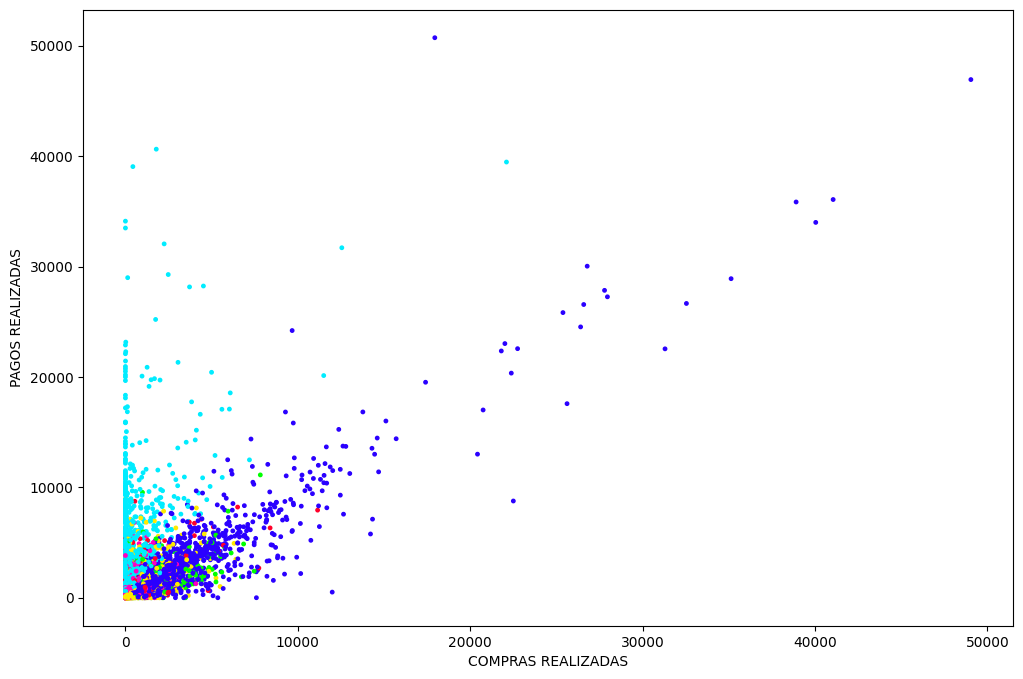

In [ ]:
# 2°) Luego importamos MATPLOTLIB, y creamos grafico, graficamos 2 Atributos que se releacionen entre si, comparamos COMPRAS con PAGOS --->

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(dataset["PURCHASES"], dataset["PAYMENTS"], c=labels, s=6, cmap="gist_rainbow")#S=6,tamaño de los puntos,c=labels,para cada punto de Cluster y color,cmap=paleta de colores
plt.xlabel('COMPRAS REALIZADAS')
plt.ylabel('PAGOS REALIZADAS')
plt.show

# Nos devuelve las Compras Realizadas comparadas con los Pagos Realizados, visualmente podemos distinguir 2 CLUSTERS dominantes, el ROJO y el AZUL, en Pagos Realizados
# vemos una tendencia vertical en aumento, esto quiere decir que efectivamente si uno trabaja en una financiera lo mas logico que si la gente tiene una tarjeta de
# credito PAGE!, En Compras Realizadas podemos ver que compraron 10000 por ejemplo y Pagaron 2000, tambien vemos por ejemplo que lapersona gasto 50000 y Pago 50000,
# o Compro por 8000 y Pgo por 0. En el Cluster AMARILLO podemos ver que Compraron por 0 y Pagaron por 0.
# Visualmente tendriamos que hacer este ejercicio comparando 1 a 1 los de 16 Atributos, pero NO seria nada sencillo.


In [ ]:
# 3°) Podemos tratar de Visualizar todo esto par a par en una sola grafica, la biblioteca de SEABORN, nos da esa posibilidad --->

# import seaborn as sns

# sns.pairplot(dataset[0:], hue='CLUSTER', palette='viridis')   # dataset[0:]= para visualizar el dataset completo, HUE=nos define que queremos de resaltar.

# NOS VA A GRAFICAR NUESTROS 16 ATRIBUTOS RELACIONADAS ENTRE SI, ES DECIR 256 ATRIBUTOS.
# EN CONLUSION: HAY CASOS EN LOS QUE EL ANALISIS VISUAL NO ES VIABLE, NO ES CONVENIENTE, ES RELATIVAMENTE IMPOSIBLE DE HACER CUANDO ESTAMOS HABLANDO
# DE TANTOS ATRIBUTOS COMO ES ESTE CASO!

# TIEMPO MUY COSTOSO DE EJECUCION!!!

# <font color=red>  **6. Entendiendo los valores de los atributos en los *clusters***</font>




###-**Entendiendo los Atributos de en los CLUSTERS (Parte I).**

Ya realizamos una Validacion de los CLUSTERS, vimos su Estrurctura, su Estabilidad y finalmente los Visulizamos con las Funciones.

In [ ]:
# 1°) Vamos a entender que quieren decir los valores de los Atributos en nuestros CLUSTERS, para esto ejecutamos un GROUPBY del dataset
# y vamos a Agrupar por CLUSTERS la informacion del dataset --->

dataset.groupby("CLUSTER").describe()

# Nos devuelve un DataFrame de 6 filas y 128 columnas, son 128 columnas porque estamos hablando de 16 atributos y cada unos de ellos tiene la cuenta(Count),
# media(Mean), desviacion Estandar(std), etc, podemos observar que el KMEANS en el CLUSTER 1 dejo la mayoria de los Clientes(count) 3203.0 y en el CLUSTER
# 5 quedo el menor numero de Clientes 342.0, en el dataframe en la parte de BALANCE, tambien vemos que en el CLUSTER 1 aparece el menor saldo disponible
# de 418.03 y el mas alto es de los Clientes del CLUSTER 0 de 3242.2, en PURCHESES(compras) podemos observar que la media mas alta la vemos en el CLUSTER 1
# vemos que los demas estan entre 300 y 900 dolares, con seguridad el CLUSTER 1 con los Clientes que mas consumen con su tarjeta de credito.

# HACER ESTE ANALISIS DE ESTA FORMA CON EL CUADRO NO ES SENCILLO Y PARA ESTO TENEMOS LAS HERRAMIENTAS DE PYTHON!

BALANCE                                                     \
          count         mean          std         min          25%   
CLUSTER                                                              
0         342.0  1959.062058  1816.549846   70.794108  1010.501276   
1        3203.0   418.043217   797.366382    0.000000    22.836917   
2        1797.0  3245.188296  2630.078110  114.523682  1358.513908   
3         980.0  1765.930464  2002.399798    0.000000   496.729589   
4        1487.0  1118.416028  1648.962974    0.000000   208.867070   
5        1141.0  2425.730241  2030.983642    1.691842   942.329974   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
CLUSTER                                                                       
0        1301.788287  2150.506925  11209.370760             342.0  0.987365   
1          79.345909   379.791429   7533.854422            3203.0  0.774420   
2        2270.955171  4496.709257  18495.558550            1797.0  0.998536   
3        1064.390915  2266.235261  14581.459140             980.0  0.856339   
4         541.240795  1357.885439  19043.138560            1487.0  0.929561   
5        1843.191023  3300.735817  11581.933500            1141.0  0.891837   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
CLUSTER  ...                                                             
0        ...      8172.035927  76406.207520            342.0  0.022729   
1        ...       238.935250   3933.230932           3203.0  0.252640   
2        ...      1460.635220   9642.502512           1797.0  0.000097   
3        ...       890.006121  21235.065300            980.0  0.128571   
4        ...       500.419877  18621.013310           1487.0  0.284099   
5        ...      1026.828021   8644.138069           1141.0  0.008885   

                                                           
              std  min  25%       50%       75%       max  
CLUSTER                                                    
0        0.099126  0.0  0.0  0.000000  0.000000  1.000000  
1        0.348828  0.0  0.0  0.000000  0.454545  1.000000  
2        0.002908  0.0  0.0  0.000000  0.000000  0.090909  
3        0.197457  0.0  0.0  0.083333  0.166667  1.000000  
4        0.369403  0.0  0.0  0.083333  0.571429  1.000000  
5        0.044426  0.0  0.0  0.000000  0.000000  0.600000  

[6 rows x 128 columns]

In [ ]:
# 2°) Ahora vamos a ver los CENTRIODES de cada CLUSTERS --->

kmeans.cluster_centers_

# Nos devuelve un array con todos los cenntriodes de cada uno de los 6 CLUSTERS, cada uno de estos CENTRIODES tiene 16 valores que corresponde al
# valor de cada Atributo, por ejemplo 6.52063823e-02 correspondes al CENTRIODE del CLUSTER 0 de BALANCE, 2.31481221e-04 corresponde a BALANCE FREQUENCY
# Entonces debemos notar nuestros CENTRIODES y ver cuales encontramos mas VARIABILIDAD, ya que la Variabilidad es la VARIANZA de nuestro conjunto de datos.
# Mientras hay una VARIABILIDAD MAYOR hay mas informacion en nuestro Atributo que nos va a servir para poder darle una interpretacion adecueda a nuestro
# CLUSTER.


array([[2.97207546e-01, 2.43631587e-04, 1.49290817e-01, 2.79511916e-02,
        1.21755606e-01, 6.05177131e-02, 1.51365261e-04, 1.76554589e-05,
        1.38745167e-04, 1.87074705e-05, 4.31843934e-04, 3.61969510e-03,
        3.41175949e-01, 2.38002578e-01, 7.26778291e-01, 4.46243187e-06],
       [6.51891487e-02, 2.31517721e-04, 1.22178325e-01, 4.79126660e-02,
        7.43682977e-02, 1.96931973e-02, 1.74957103e-04, 3.38268692e-05,
        1.42042228e-04, 7.31609841e-06, 1.14836315e-04, 2.89260277e-03,
        9.45483950e-01, 1.54629404e-01, 5.57959186e-02, 7.79776326e-05],
       [5.61755351e-01, 3.00238566e-04, 8.32300186e-02, 4.70383031e-02,
        3.62295453e-02, 1.05265336e-01, 8.67633056e-05, 3.31513131e-05,
        6.00300755e-05, 4.31455709e-05, 7.55860118e-04, 1.83938142e-03,
        7.20742051e-01, 1.91179024e-01, 2.10549568e-01, 1.15887991e-07],
       [2.29045356e-01, 2.10580758e-04, 6.85258552e-02, 3.87980177e-02,
        2.97335416e-02, 3.65403026e-01, 5.84641147e-05, 2.268

In [ ]:
# 3°) Creamos un DataFrame y le atribuimos nuestros CENTERS y la columna dataset, antes borramos la columna CLUSTER que habiamos
# creado con anterioridaad para facilitar la Visualizacion de los CENTRIODES --->

dataset.drop(columns="CLUSTER", inplace=True)
centriods = pd.DataFrame(kmeans.cluster_centers_, columns=dataset.columns)
round(centriods.var(),3).sort_values(ascending=False) # ROUND=para que lo muestre sin todos los decimales,VAR=para calcular la VARIANZA de los CENTRIODES
# SORT_VALUES= Para ordenar esos valores, cuales son los Atributos qye tiene mayor VARIANZA, mas importantes.

# PODEMOS NOTAR QUE MINIMUM_PAYMETS TIENE UNA VARIANZA DE 0.065, VA DISMINUYENDO HASTA LOS ATRIBUTOS CON VARIANZAS DESCONSIDERABLES(0.00)

MINIMUM_PAYMENTS                    0.065
CREDIT_LIMIT                        0.042
CASH_ADVANCE                        0.041
PAYMENTS                            0.036
BALANCE                             0.030
PURCHASES                           0.022
ONEOFF_PURCHASES                    0.008
INSTALLMENTS_PURCHASES              0.004
BALANCE_FREQUENCY                   0.000
PURCHASES_FREQUENCY                 0.000
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
CASH_ADVANCE_FREQUENCY              0.000
CASH_ADVANCE_TRX                    0.000
PURCHASES_TRX                       0.000
PRC_FULL_PAYMENT                    0.000
dtype: float64

Ejercicio:

Supongamos que tenemos un dataset con las siguientes dimensiones: (25500,21). Luego de ejecutar kmeans, se obtienen 7 clusters. Al utilizar la función groupby(), agrupando por clusters, y al aplicar el método describe() ¿Cuáles serán las nuevas dimensiones del dataframe?

(7,160):Al multiplicar cada uno de los atributos por las 8 medidas, obtendremos 160 columnas.

###-**Entendiendo los Atributos de en los CLUSTERS (Parte II).**

Para poder analizar eso 6 Atributos que ya pudimos identificar, vamos a hacer un GROUPBY nuevamente para analizarlos mas detenidamente de forma mas puntual.

In [ ]:
# 4°) Antes de hacer GROUPBY, vamos a recuperar la columna de CLUSTER que le hicimos un DROP, y a esta columna le asignamos los
# LABELS de nuestro KMEANS --->

dataset["CLUSTER"] = labels
dataset.groupby("CLUSTER")["PURCHASES","BALANCE","CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"].describe()#Agrupamos por Atributos mas importantes(VARIANZA)

# Nos devuelve un dataset mucho mas pequeño, mas facil de Visualizar, en compras(PURCHESES)esta el nuemro de clientes(COUNT) y la MEDIA de compras es de 3330.05
# dolares fue de los clientes colocados en el CLUSTER 1, en CASH_ADVANCE los que mas solicitaron fueron los que pertenecen al CLUSTER 3 y CLUSTER 4 y los que
# menos piden son los del CLUSTER 2 de acuerdo a la MEDIA(MEAN).
# LO QUE SIEMPRE QUEREMOS VER ES LA MEDIA(MEAN) QUE ES DONDE PODEMOS TENER MAS CONCLUCIONES!


<ipython-input-135-607cba5578e9>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby("CLUSTER")["PURCHASES","BALANCE","CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"].describe()#Agrupamos por Atributos mas importantes(VARIANZA)


PURCHASES                                                        \
            count         mean          std     min       25%       50%   
CLUSTER                                                                   
0           342.0   856.281725  1276.797822    0.00   108.000   479.715   
1          3203.0   628.781670   752.795069    0.00   134.735   365.360   
2          1797.0   518.504224   945.129500    0.00     0.000   142.800   
3           980.0   528.087051  1249.536289    0.00     0.000    73.160   
4          1487.0  3328.473968  4124.996729  100.98  1178.700  2186.220   
5          1141.0   239.376889   477.552889    0.00     0.000     0.000   

                             BALANCE               ...     PAYMENTS  \
               75%       max   count         mean  ...          75%   
CLUSTER                                            ...                
0        1053.1575  11147.33   342.0  1959.062058  ...  1651.797664   
1         832.6900   6407.67  3203.0   418.043217  ...  1047.473440   
2         584.4000   7823.74  1797.0  3245.188296  ...  1367.537734   
3         570.4500  22101.78   980.0  1765.930464  ...  6311.300088   
4        3911.2050  49039.57  1487.0  1118.416028  ...  3714.035116   
5         299.3800   4085.81  1141.0  2425.730241  ...  1281.454609   

                      MINIMUM_PAYMENTS                                        \
                  max            count         mean          std         min   
CLUSTER                                                                        
0         8735.607835            342.0  6865.322947  9204.125003  252.515849   
1         8946.495566           3203.0   220.681695   211.182140    0.019163   
2        11123.409180           1797.0  1150.432401  1030.747415  152.279898   
3        40627.595240            980.0   746.804763  1143.573649    1.334075   
4        50721.483360           1487.0   537.754177  1119.617203   14.012997   
5         7964.175992           1141.0   796.052139   757.083767    8.561540   

                                                              
                 25%          50%          75%           max  
CLUSTER                                                       
0        1864.863032  3410.360257  8172.035927  76406.207520  
1         119.087089   170.737760   238.935250   3933.230932  
2         462.787650   813.974537  1460.635220   9642.502512  
3         221.291629   446.513325   890.006121  21235.065300  
4         168.444460   215.007957   500.419877  18621.013310  
5         312.343947   546.469472  1026.828021   8644.138069  

[6 rows x 48 columns]

In [ ]:
# 5°) Ahora vemos esos valores con respecto a la MEDIA(MEAN) solamente --->

description = round(dataset.groupby("CLUSTER")[["PURCHASES","BALANCE","CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]].mean(),2)
description

# Nos devuelve la MEDIA de cada uno de los Atributos.

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
CLUSTER,,,,,,
0,856.28,1959.06,451.82,2198.68,1339.89,6865.32
1,628.78,418.04,119.40,5132.73,816.71,220.68
2,518.50,3245.19,765.46,4421.34,1052.40,1150.43
3,528.09,1765.93,3088.66,3950.84,4997.17,746.80
4,3328.47,1118.42,185.76,4110.13,3051.12,537.75
5,239.38,2425.73,3107.17,4472.39,974.66,796.05


In [ ]:
# 6°) Creamos la columna de los CLIENTES, para poder interpretar los CLUSTER segun CLIENTES --->

description["N_CUSTOMERS"] = dataset.CLUSTER.value_counts()# N_CUSTOMERS= n° de Clientes, value_counts()=Para que nos cuente los n° de Clientes por cada CLUSTERS
description


,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,856.28,1959.06,451.82,2198.68,1339.89,6865.32,342
1,628.78,418.04,119.40,5132.73,816.71,220.68,3203
2,518.50,3245.19,765.46,4421.34,1052.40,1150.43,1797
3,528.09,1765.93,3088.66,3950.84,4997.17,746.80,980
4,3328.47,1118.42,185.76,4110.13,3051.12,537.75,1487
5,239.38,2425.73,3107.17,4472.39,974.66,796.05,1141


Ejercicio:

Rafael generó clusters de usuarios de una página web de lectura con base en información diferente, como por ejemplo, el número de libros leídos por mes y por año. En total, 17 atributos fueron empleados para generar los clusters. La siguiente Pandas Series presenta cada atributo y el valor de la varianza calculado con base en los centroides de los clusters. Rafael quiere entender cada uno de los clusters generados. Sin embargo, él necesita seleccionar solamente 5 atributos para que sean analizados?.



*   Rafael podría escoger los atributos del 13 al 17.
 Estos atributos pueden representar bien a los clusters pues los valores de varianza obtenidos indican que el valor del centroide se diferencia entre los clusters.
*   Rafael podría escoger el atributo 12.
Este atributo puede representar a los clusters ya que el valor de varianza obtenido indica que el valor del centroide se diferencia entre los clusters.



# <font color=red> **7. Interpretando los *clusters***</font>


In [ ]:
# 1°) Seleccionamos todas las Variables de la pagina y copiamos en una celda de texto para tener mas a mano que quiere decir cada uno de
# los Atributos, luego solo dejamos ls 6 que usamos y agregamos PCRFULLPAYMENT --->

BALANCE : Balance amount left in their account to make purchases (

PURCHASES : Amount of purchases made from account

CASH_ADVANCE : Cash in advance given by the user

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRC_FULL_PAYMENT : Percent of full payment paid by user


In [ ]:
# 2°) Traemos nuestra DESCRIPTION(cuadro)--->

description

# CADA VEZ QUE EJECUTAMOS LA CELDA CAMBIAN LOS VALORES, POR ESO PUEDE SER QUE NO COINCIDAN LOS VALORES CON LAS CONCLUCIONES!


,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,856.28,1959.06,451.82,2198.68,1339.89,6865.32,342
1,628.78,418.04,119.40,5132.73,816.71,220.68,3203
2,518.50,3245.19,765.46,4421.34,1052.40,1150.43,1797
3,528.09,1765.93,3088.66,3950.84,4997.17,746.80,980
4,3328.47,1118.42,185.76,4110.13,3051.12,537.75,1487
5,239.38,2425.73,3107.17,4472.39,974.66,796.05,1141


In [ ]:
# 3°) Vamoa a ir viendo nuestros PROMEDIOS de cada unos de los Atributos por CLUSTERS y vamos a ir sacando nuestros insight(Concluciones)--->

 <font color=orange>CLUSTER 0</font>: Realiza menos compras (Purchases 519.33). Tiene mas saldo disponible para compras (BALANCE 3242.27	).

 <font color=orange>CLUSTER 1</font>: Tiene menos saldo disponible para compras (BALANCE 418.04). Solicita menos avances en efectivo (Cash_Advance 119.40). Limite de credito mas alto (Limit_Credit 5132.73)

 <font color=orange>CLUSTER 2</font>: Solicita mas avances en efectivo (Cash_Advance 3088.66).

 <font color=orange>CLUSTER 3</font>: Realiza mas compras (Purchases 3330.06).

 <font color=orange>CLUSTER 4</font>: Solicita mas avances en efectivo (Cash_Advance 3106.66).

 <font color=orange>CLUSTER 5</font>: Limite de credito mas bajo (Limit_Credit 2198.68).

- En **PAYMENTS**, NO es facil analizar este Atributo con esa informacion ya que por ejemplo el CLUSTER 2 pide mucho adelante en efectivo y puede estar pagando ese adelanto.
- Lo mismo para con **MINIMUM_PAYMENTS**, por ejemplo el CLUSTER 5 realiza pagos minimos de 6865 y tambien hay pagos minimos de 220 como en el CLUSTER 1, NO se puede hacer una comparacion.
- Para esto tenemos que traer el Atributo de PRCFULLPAYMENT que NO fue montado a nuestros CLUSTERS porque NO vieron mucha VARIANZA en el, la CLUSTERIZACION nos ayuda a hacer las agrupaciones, pero esto se tiene que completar con el analisis de los datos visual, para tener una mejor conclucion.

***Ejercicio:***

3 socios quieren entender el comportamiento de los clientes de su tienda y para esto, ellos agruparon a sus clientes en clusters. Ellos optaron por interpretar los clusters con base en el valor promedio gastado por los clientes durante el último año, analizando conjuntamente cuántos clientes estaban en cada rango de valores. Los siguientes datos fueron generados para 5 clusters:

Valor en gastos
Número de clientes

Cluster 1
50390.00
781
Cluster 2
34021.23
1529
Cluster 3
4827.91
202
Cluster 4
5191.89
5098
Cluster 5
1324.12
4089  

RTA:

*   Es necesario el análisis de otro atributo para que podamos interpretar los clusters 3 y 4.
Ambos clusters presentan gastos similares; entretanto, mientras uno de ellos contiene el menor número de clientes, el otro contiene el mayor. Necesitamos otro atributo para entender mejor cuál otra característica podría haber generado a esta división.
*   El cluster con los clientes que más gastan abarca un pequeño número de clientes.
El cluster 1 contiene 781 clientes, representando a quienes en promedio más gastan.



###-**Interpretando los Clusters (Parte II).**

Hay un Atributo mas que nos va ayudar a interpretar los pagos (PAYMENTS-MINIMUM_PAYMENTS), para eso vamos a usar el Atributo de PORCENTAJE DE PAGO COMPLETO (PRC_FULL_PAYMENTS).

In [ ]:
# 4°) Hacemos un GROUPBY para NO cambiar toda la tabla que hemos creado --->

dataset.groupby("CLUSTER")["PRC_FULL_PAYMENT"].mean()

# VER CONCLUIONES EN CUADERNILLO YA QUE SON VALORES DIFERNETES, LAS CONCLUCIONES FUERON REALIZADAS DE ACUERDO A LOS DATOS GENERADOS POR LOS CLUSTERS
# EN ESE MOMENTO Y COMO AGRUPARON, KEMANS ES UN ALGORITMO NO DETERMINISTICO, CON CADA EJECUCION LOS RESULTADOS VAN A CAMBIAR UN POCO, LOS CLUSTERS NO
# VAN A SER LO MISMO A PESAR QUE VAN A COINCIDIR LOS MISMOS VALORES.

CLUSTER
0    0.022729
1    0.252640
2    0.000097
3    0.128571
4    0.284099
5    0.008885
Name: PRC_FULL_PAYMENT, dtype: float64

Ejercicio:

***Considere las siguientes afirmaciones:***

1-Al realizar la interpretación de los clusters no hay espacio para la subjetividad. El análisis es completamente objetivo.

2-El resultado obtenido después de generar los clusters facilita la interpretación de los datos y esto permite rotular cada agrupación.

***Señala la alternativa correcta***:

- Solamente la segunda afirmación es verdadera.
Este es el propósito de utilizar técnicas de clusterización.

###-**Interpretando los Clusters (Parte I).**

Primero volvemos a la pagina de los datos KAGGLE.

###-**Utilizando los CLUSTERS.**



 <font color=orange>**El CLUSTER 0**</font> por ejemplo es el que más realiza, el grupo de clientes que más realiza gastos con compras, son los que mejor pagan, tienen un límite de crédito medio y su números de clientes es alrededor de 1500. Entonces es un número, digamos no es el número más alto ni el segundo más alto, sino es el tercero.
 Entonces no es un grupo muy numeroso, sin embargo se podría estudiar una estrategia en la cual se hace un convenio con una empresa de puntos y entonces si la persona compra con ellos, o utilizando ese convenio puede ganar ciertos beneficios, sería una posibilidad.

 <font color=orange>**El CLUSTER 1**</font> en el cual se encuentra el número de clientes que tiene menos saldo disponible para compras.
Solicita menos avances en efectivo, tiene el límite de crédito más alto, pagan bien y es el grupo más numeroso de clientes. Aquí podríamos aplicar una estrategia para ganar más dinero y tal vez aumentarles paulatinamente su cupo de crédito para que puedan comprar más.
Si las personas aquí nos muestran que tienen menos saldo y están pagando bien, eso quiere decir que se les puede aumentar un poco el saldo o un poco el límite de crédito y de esa forma la persona se incentiva a comprar más.

 <font color=orange>**El CLUSTER 2**</font> se podría utilizar una estrategia opuesta. Digamos, ellos tienen más saldo disponible para compras pero son los peores para pagar y tienen un límite de crédito más alto, es el segundo límite de crédito más alto. Entonces se podría también utilizar alguna estrategia para tratar de filtrar mejor este grupo y ver verdaderamente quiénes son los que están generando pérdidas.
Entonces es muy importante, porque si tienen un límite de crédito tan alto se puede estar también yendo bastante lucro en este sentido.

 <font color=orange>**Creamos nuestros seis CLUSTERS**</font> y lo más importante es que ya por ejemplo tenemos un grupo al cual le podríamos aplicar una estrategia.
 Vamos a escoger el **grupo número 1**, que es el grupo más numeroso, que pagan bien, que tienen un límite de crédito alto, pero que también si se les aumenta el límite de crédito, existe la posibilidad que estas personas compren más porque su saldo para compras es bajo.
Eso quiere decir que si la persona paga bien, tiene un límite de crédito alto pero su saldo es bajo, entonces si se le aumenta un poco más el límite de crédito, su saldo para compras va a aumentar y la persona se anima a comprar más. **Esto se hace a través de un test A/B.**

-  <font color=orange>***El test A/B***</font> es una estrategia de negocios bastante reconocida, muy usada en el área de marketing, en campañas de marketing y en varios ámbitos de la parte financiera, porque se aplica una estrategia de negocios a un grupo en específico. Se toma un grupo de clientes con características semejantes y se separa en dos.

 Se divide en dos. Entonces uno de ellos va a ser el grupo control, al cual no se le va a aplicar ningún tipo de estrategias de negocios. Y el otro va a ser el grupo de test, en el cual sí se va aplicar la estrategia de negocios. ¿Entonces cuál es el objetivo? Es por ejemplo al grupo de control no se le aumenta el límite de crédito pero al grupo de test sí se le aumenta paulatinamente el cupo en su tarjeta.

 Entonces, después de un año por lo menos, ya se toman esos resultados y se observa, por ejemplo, que si el grupo test gastó más, es decir, recibió, gastó más y pagó más, entonces se puede observar que verdaderamente es una estrategia válida para ganar dinero y se puede proceder entonces a aplicar a todo el grupo.

 Pero si por ejemplo se observa, en el lapso de ese año, el grupo test compró más y siguió pagando y el grupo de control también, compro más y siguió pagando aun sin haber recibido el aumento paulatino de su límite de crédito, entonces no se trata de que este aumento en su límite de crédito sea el que esté ocasionando que este grupo esté comprando más o esté utilizando más su tarjeta de crédito y tenga un saldo disponible allí para sus compras de cierta forma como menos alto.

Definicion:

- Una de las principales aplicaciones después de utilizar técnicas clusterización sería, por ejemplo, el idear una estrategia de negocios para generar más ingresos en nuestra empresa.

- Para realizar el Test A/B se divide el cluster en 2 y se aplica la estrategia a uno de los grupos (grupo de prueba), mientras que el otro grupo (grupo de control) permanece sin ninguna estrategia.
Esto permitirá evaluar la efectividad de la estrategia en determinado grupo de clientes, al tener como referencia clientes con patrones de comportamiento semejantes.

<font color=orange>***-CONCLUCIONES CON LOS DATOS GENERADOS:***





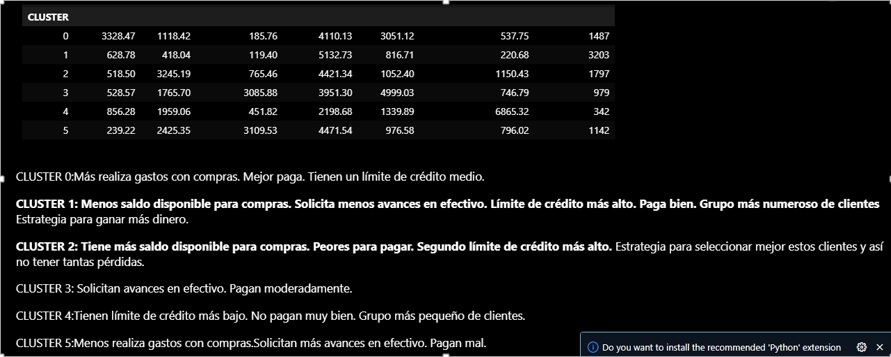



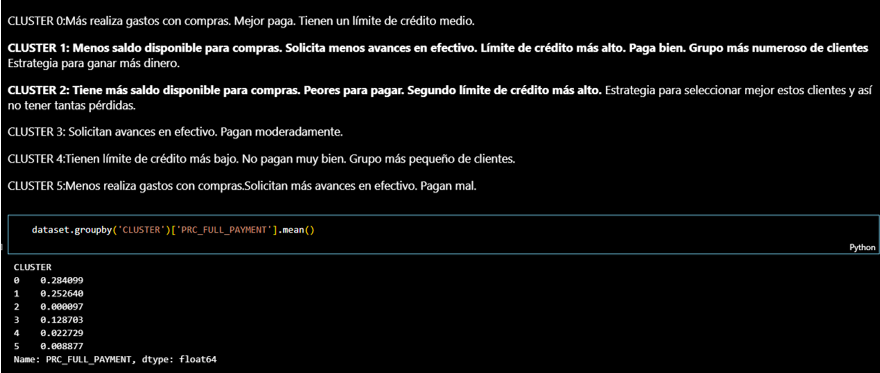